In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math

In [2]:
G = nx.DiGraph()
G.add_nodes_from(range(8))
G.add_edge(0, 1, weight=5)
G.add_edge(0, 4, weight=11)
G.add_edge(1, 2, weight=3)
G.add_edge(1, 6, weight=13)
G.add_edge(2, 3, weight=12)
G.add_edge(2, 6, weight=9)
G.add_edge(3, 7, weight=1)
G.add_edge(4, 1, weight=6)
G.add_edge(5, 1, weight=2)
G.add_edge(5, 4, weight=10)
G.add_edge(6, 5, weight=7)
G.add_edge(6, 7, weight=8)
G.add_edge(7, 2, weight=4)

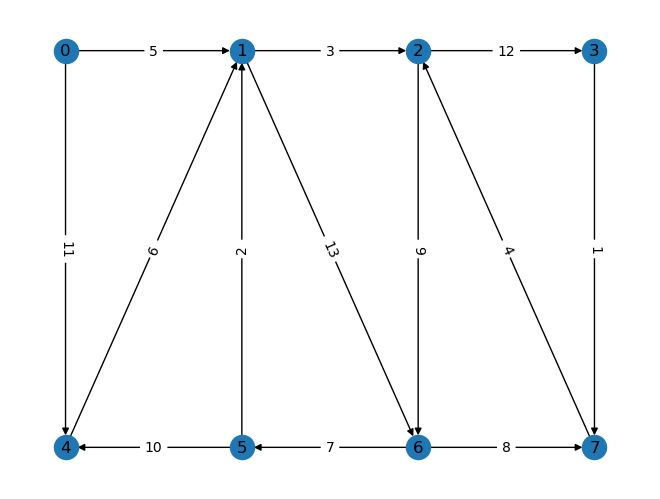

In [3]:
pos = nx.bipartite_layout(G,[4, 5, 6, 7], "horizontal")
nx.draw(G, pos)
nx.draw_networkx_labels(G, pos)
edge_labels = nx.get_edge_attributes(G,'weight')
_ = nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

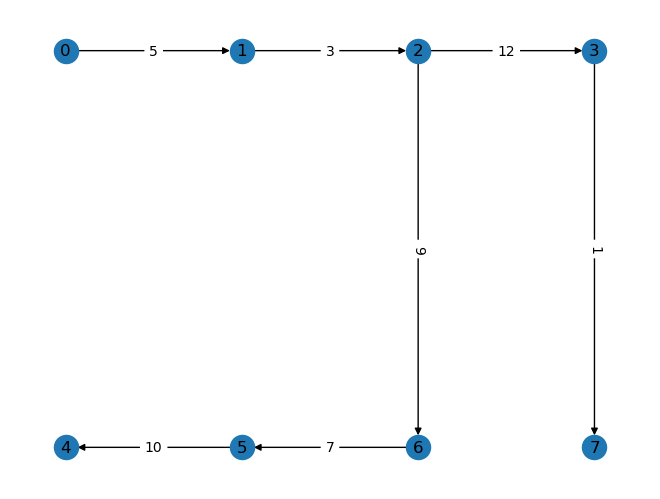

In [4]:
arb = nx.algorithms.tree.minimum_spanning_arborescence(G)
pos = nx.bipartite_layout(arb,[4, 5, 6, 7], "horizontal")
nx.draw(arb, pos)
nx.draw_networkx_labels(arb, pos)
edge_labels = nx.get_edge_attributes(arb,'weight')
_ = nx.draw_networkx_edge_labels(arb, pos, edge_labels=edge_labels)

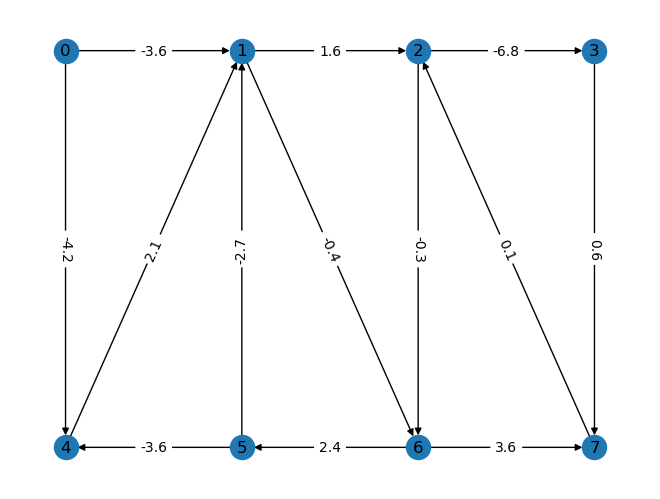

In [18]:
# creating a new graph with weighted nodes

G = nx.DiGraph()

G.add_nodes_from([(0, {'w': 1}), (1, {'w': 5}), (2, {'w': 3}), (3, {'w': 7}), (4, {'w': 8}), (5, {'w': 2}), (6, {'w': 6}), (7, {'w': 4})])
G.add_edges_from([(0, 1, {'weight': .1}), (0, 4, {'weight': .4}), (1, 2, {'weight': -.2}), (1, 6, {'weight': .6}), (2, 3, {'weight': -.7}), (2, 6, {'weight': .9}), (3, 7, {'weight': -.8}), (4, 1, {'weight': -.3}), (5, 1, {'weight': .1}), (5, 4, {'weight': .4}), (6, 5, {'weight': -.4}), (6, 7, {'weight': .8}), (7, 2, {'weight': -.9})])

# calculating new weights based on boundary polarity priors

nodeWeights = nx.get_node_attributes(G, 'w')
Gbpp = nx.DiGraph()
Gbpp.add_nodes_from(G.nodes)

for (u, v) in G.edges:
    a = G.get_edge_data(u, v)['weight']
    wu, wv = nodeWeights[u], nodeWeights[v]
    at = (1 + a) if wu > wv else (1 - a) if wu < wv else 1

    Gbpp.add_edge(u, v, weight=round((nodeWeights[u] - nodeWeights[v]) * at, 2)) # ||I(u) - I(v)|| * a


pos = nx.bipartite_layout(Gbpp,[4, 5, 6, 7], "horizontal")
nx.draw(Gbpp, pos)
nx.draw_networkx_labels(Gbpp, pos)
edge_labels = nx.get_edge_attributes(Gbpp,'weight')
_ = nx.draw_networkx_edge_labels(Gbpp, pos, edge_labels=edge_labels)

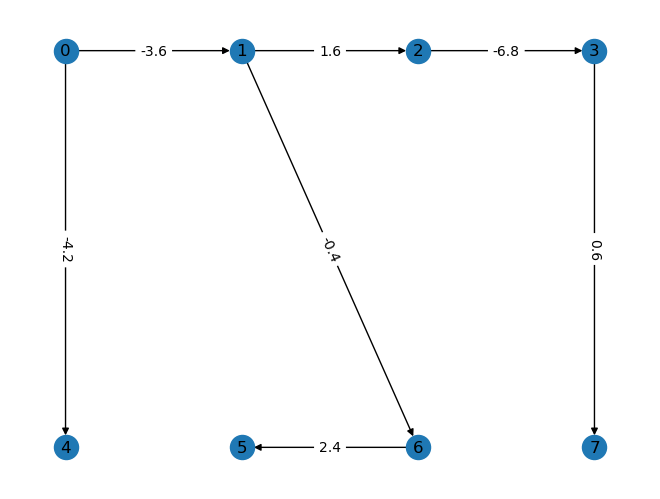

In [19]:
# running arborescence for the new graph

arb = nx.algorithms.tree.minimum_spanning_arborescence(Gbpp)
pos = nx.bipartite_layout(arb,[4, 5, 6, 7], "horizontal")
nx.draw(arb, pos)
nx.draw_networkx_labels(arb, pos)
edge_labels = nx.get_edge_attributes(arb,'weight')
edge_labels = {k: round(edge_labels[k], 2) for k in edge_labels.keys()}
_ = nx.draw_networkx_edge_labels(arb, pos, edge_labels=edge_labels)